In [39]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from math import fabs
from __future__ import division
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
from random import uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [52]:
X = np.random.rand(5000,2)*8-4
y = [0]*5000 

In [54]:

for i in range(len(X)):
    if((X[i][0])**2+(X[i][1]+2)**2<=1 or 
      (X[i][0]-3)**2+(X[i][1]-1)**2<=0.75 or
      (X[i][0]+2)**2+(X[i][1]-1.5)**2<=2 ):
        y[i] = 1
y=np.array(y)

In [55]:
#Dividir entre Train y Test

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3,stratify=y)

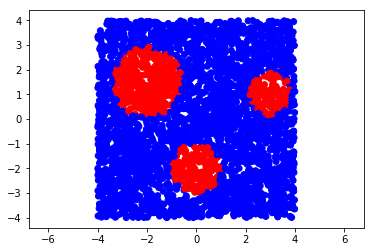

In [56]:
plt.scatter(X_train[:,0],X_train[:,1],c=['red' if i==1 else 'blue' for i in y_train])
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.axis('equal')
plt.show()

In [79]:

neighbors = np.arange(1, 9)
knn_accuracy = np.empty(len(neighbors))
svm_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    svm=SVC(C=k,kernel='linear',probability=True)

    
    knn.fit(X_train,y_train)
    svm.fit(X_train,y_train)
    #Accuracy with knn
    knn_accuracy[i] = knn.score(X_train, y_train)

    ##Accuracy with svm
    svm_accuracy[i] = svm.score(X_test, y_test)


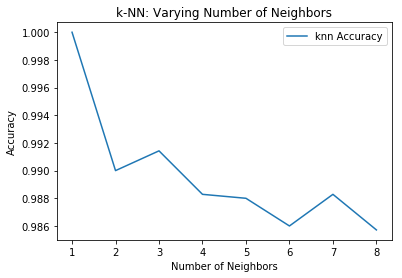

In [81]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, knn_accuracy, label = 'knn Accuracy')
#plt.plot(neighbors, svm_accuracy, label = 'svm Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

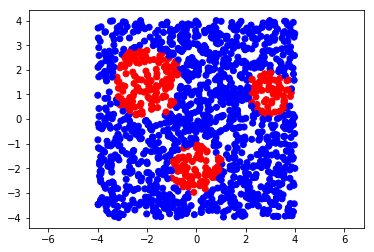

In [75]:
plt.scatter((X_test[:,0]),(X_test[:,1]),c=['red' if i==1 else 'blue' for i in knn.predict(X_test)])
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.axis('equal')
plt.show()

In [91]:
svm=SVC(C=3,kernel='linear',probability=True)
svm.fit(X_train,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
knn.score(X_test,y_test)

0.98666666666666669

In [95]:
svm.score(X_test, y_test)

0.80466666666666664